In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [114]:
df = pd.read_csv('ML_cars.csv')

In [115]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [116]:
columnas_a_eliminar = ['aspiration', 'drivewheel', 'enginelocation', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'curbweight', 'wheelbase', 'cylindernumber','enginetype']


In [117]:
df.drop(columnas_a_eliminar, axis=1, inplace=True)

In [118]:
df

,car_ID,symboling,CarName,fueltype,doornumber,carbody,carlength,carwidth,carheight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,two,convertible,168.8,64.1,48.8,130,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,two,convertible,168.8,64.1,48.8,130,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,171.2,65.5,52.4,152,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,four,sedan,176.6,66.2,54.3,109,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,four,sedan,176.6,66.4,54.3,136,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,four,sedan,188.8,68.9,55.5,141,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,four,sedan,188.8,68.8,55.5,141,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,four,sedan,188.8,68.9,55.5,173,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,four,sedan,188.8,68.9,55.5,145,106,4800,26,27,22470.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_ID      205 non-null    int64  
 1   symboling   205 non-null    int64  
 2   CarName     205 non-null    object 
 3   fueltype    205 non-null    object 
 4   doornumber  205 non-null    object 
 5   carbody     205 non-null    object 
 6   carlength   205 non-null    float64
 7   carwidth    205 non-null    float64
 8   carheight   205 non-null    float64
 9   enginesize  205 non-null    int64  
 10  horsepower  205 non-null    int64  
 11  peakrpm     205 non-null    int64  
 12  citympg     205 non-null    int64  
 13  highwaympg  205 non-null    int64  
 14  price       205 non-null    float64
dtypes: float64(4), int64(7), object(4)
memory usage: 24.1+ KB


In [120]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [121]:
#Se reemplazan los valores de gas por 0 y diesel por 1
df['fueltype'] = df['fueltype'].replace({'gas': 0, 'diesel': 1}, inplace=False)

In [122]:
df['doornumber'].value_counts()


doornumber
four    115
two      90
Name: count, dtype: int64

In [123]:
#Se reemplazan las filas con la palabra four y two por el número que corresponde en la columna Numero de puertas
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}, inplace=False)

In [124]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte.

In [125]:
#Se convierte la columna de precios a categorías 'barato' y 'caro' utilizando la mediana 

precio_mediana = df['price'].median()
df['precio_categoria'] = pd.cut(df['price'], bins=[float('-inf'), precio_mediana, float('inf')], labels=['barato', 'caro'])


In [126]:
df

,car_ID,symboling,CarName,fueltype,doornumber,carbody,carlength,carwidth,carheight,enginesize,horsepower,peakrpm,citympg,highwaympg,price,precio_categoria
0,1,3,alfa-romero giulia,0,2,convertible,168.8,64.1,48.8,130,111,5000,21,27,13495.0,caro
1,2,3,alfa-romero stelvio,0,2,convertible,168.8,64.1,48.8,130,111,5000,21,27,16500.0,caro
2,3,1,alfa-romero Quadrifoglio,0,2,hatchback,171.2,65.5,52.4,152,154,5000,19,26,16500.0,caro
3,4,2,audi 100 ls,0,4,sedan,176.6,66.2,54.3,109,102,5500,24,30,13950.0,caro
4,5,2,audi 100ls,0,4,sedan,176.6,66.4,54.3,136,115,5500,18,22,17450.0,caro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,4,sedan,188.8,68.9,55.5,141,114,5400,23,28,16845.0,caro
201,202,-1,volvo 144ea,0,4,sedan,188.8,68.8,55.5,141,160,5300,19,25,19045.0,caro
202,203,-1,volvo 244dl,0,4,sedan,188.8,68.9,55.5,173,134,5500,18,23,21485.0,caro
203,204,-1,volvo 246,1,4,sedan,188.8,68.9,55.5,145,106,4800,26,27,22470.0,caro


In [127]:
df['precio_categoria'].value_counts()

precio_categoria
barato    103
caro      102
Name: count, dtype: int64

In [128]:
#Se codifica a 0 y 1 las categorías 'barato' y 'caro'
label_encoder = LabelEncoder()
df['precio_categoria'] = label_encoder.fit_transform(df['precio_categoria'])

In [129]:
#Barato= 0
#Caro=1

df['precio_categoria'].value_counts()

precio_categoria
0    103
1    102
Name: count, dtype: int64

In [130]:
#Se eligen los parámetros que se utilizarán y la variable a predecir

X=df[['fueltype', 'doornumber', 'enginesize', 'horsepower', 'peakrpm']]
y=df[['precio_categoria']]

In [131]:
#Se dividen los datos en conjuntos de Entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se elige el clasificador de árbol de decisión
arbol_clasificador = DecisionTreeClassifier()


In [132]:
# Se aplica Gridsearch para definir los mejores hiperparámetros
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10)}

In [133]:
#Se Configura GridSearch con el clasificador, los hiperparámetros y la métrica
grid_search = GridSearchCV(arbol_clasificador, param_grid, cv=5, scoring='accuracy')

# Se Realiza GridSearch en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Se muestran los mejores hiperparámetros encontrados por GridSearch
print("Mejores parámetros:", grid_search.best_params_)

#Se muestra la precisión del modelo en los datos de prueba utilizando los mejores hiperparámetros
print("Precisión en los datos de prueba:", grid_search.score(X_test, y_test))


Mejores parámetros: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
Precisión en los datos de prueba: 0.9024390243902439


In [134]:
#Se entrena el modelo con los mejors hiperparámetros encontrados en Gridsearch
arbol_clasificador=DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=1, min_samples_split=5)
arbol_clasificador.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=5)

In [135]:
#Se realiza las predicciones en el conjunto de testeo
y_pred = arbol_clasificador.predict(X_test)


In [136]:
#Se evalua el rendimiento del modelo
Exactitud = accuracy_score(y_test, y_pred)
Reporte = classification_report(y_test, y_pred)

#Se muestran los resultados
print(f'Precisión del modelo: {Exactitud:.2f}')
print('Reporte de clasificación:\n', Reporte)

Precisión del modelo: 0.90
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.82      1.00      0.90        18

    accuracy                           0.90        41
   macro avg       0.91      0.91      0.90        41
weighted avg       0.92      0.90      0.90        41



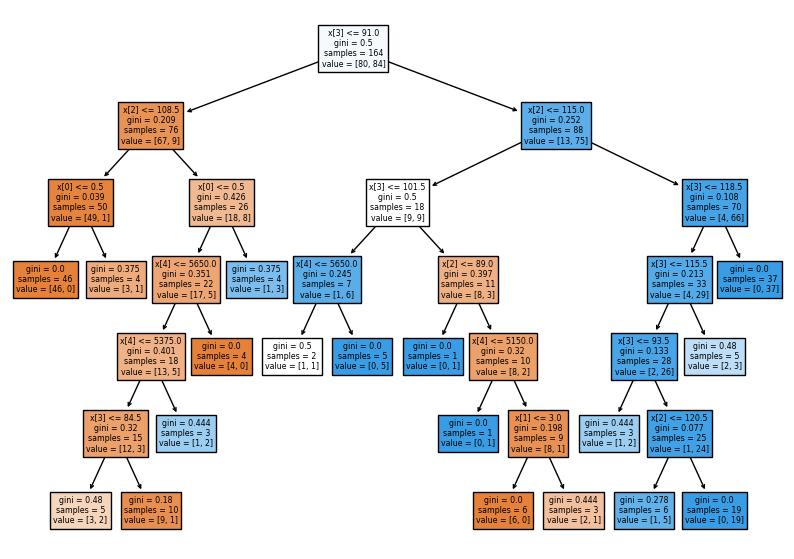

In [166]:
import matplotlib.pyplot as plt

from sklearn import tree

plt.figure(figsize = (10,7))
tree.plot_tree(arbol_clasificador, filled = True)
plt.show()

In [180]:
X.iloc[[55]]

,fueltype,doornumber,enginesize,horsepower,peakrpm
55,0,2,70,101,6000


In [193]:
arbol_clasificador.predict([[0,2,70,101,6000]])

C:\Users\Casa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos.

In [137]:
#Se eligen los parámetros que se utilizarán y la variable a predecir

X2=df[['fueltype', 'enginesize', 'horsepower','peakrpm']]
y2=df[['price']]

In [138]:
#Se dividen los datos en conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
#Se normalizan los parámetros
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [141]:
#Se crea el modelo de regresión lineal
modelo_regresion = LinearRegression()

In [142]:
#se entrena el modelo
# modelo_regresion.fit(X_train_scaled, y_train)
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [143]:
#Se realiza la predicción
y_pred = modelo_regresion.predict(X_test)
# y_pred = modelo_regresion.predict(X_test_scaled)

In [144]:
#Se evalua el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Se muestran los resultados
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
# el RMSE representa un error relativo de aproximadamente el 7.82% del rango total de precios (3555.3/(45400−5118)).

MSE: 12640147.26
R2: 0.84
RMSE: 3555.30


In [145]:
df.describe()

,car_ID,symboling,fueltype,doornumber,carlength,carwidth,carheight,enginesize,horsepower,peakrpm,citympg,highwaympg,price,precio_categoria
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.097561,3.121951,174.049268,65.907805,53.724878,126.907317,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.497561
std,59.322565,1.245307,0.297446,0.994966,12.337289,2.145204,2.443522,41.642693,39.544167,476.985643,6.542142,6.886443,7988.852332,0.501218
min,1.000000,-2.000000,0.000000,2.000000,141.100000,60.300000,47.800000,61.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,52.000000,0.000000,0.000000,2.000000,166.300000,64.100000,52.000000,97.000000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000
50%,103.000000,1.000000,0.000000,4.000000,173.200000,65.500000,54.100000,120.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000
75%,154.000000,2.000000,0.000000,4.000000,183.100000,66.900000,55.500000,141.000000,116.000000,5500.000000,30.000000,34.000000,16503.000000,1.000000
max,205.000000,3.000000,1.000000,4.000000,208.100000,72.300000,59.800000,326.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


In [146]:
print('La pendiente obtenida con Sklearn es :', modelo_regresion.coef_)
print('La ordenada al origen obtenida con Sklearn es:', modelo_regresion.intercept_)

La pendiente obtenida con Sklearn es : [[3.94059545e+03 1.23206747e+02 5.88407274e+01 1.78913770e+00]]
La ordenada al origen obtenida con Sklearn es: [-18076.53261314]


In [164]:
df.iloc[144]

car_ID                    145
symboling                   0
CarName             subaru r1
fueltype                    0
doornumber                  4
carbody                 sedan
carlength               172.0
carwidth                 65.4
carheight                54.3
enginesize                108
horsepower                 82
peakrpm                  4800
citympg                    24
highwaympg                 25
price                  9233.0
precio_categoria            0
Name: 144, dtype: object

In [162]:
modelo_regresion.coef_

array([[3.94059545e+03, 1.23206747e+02, 5.88407274e+01, 1.78913770e+00]])

In [165]:
fueltype=0
enginesize=108
horsepower=82
peakrpm=4800

preciofinal=modelo_regresion.coef_[0][0]*fueltype + modelo_regresion.coef_[0][1]*enginesize + modelo_regresion.coef_[0][2]*horsepower +  modelo_regresion.coef_[0][3]*peakrpm + modelo_regresion.intercept_
print(preciofinal)

[8642.5966009]


In [194]:
preciofinal=3940*fueltype + 123*enginesize + 58.8*horsepower +  1.79*peakrpm -18076
print(preciofinal)

8621.599999999999
